In [1]:
# Install gdown (one-time in a Colab runtime)
!pip -q install gdown

import os, zipfile, gdown

# 1) Your Google Drive share link
share_link = "https://drive.google.com/file/d/1tHE-vsqnEZZVGm3Dj1S3UnPz2cDQUJQM/view?usp=drive_link"

# 2) Download to /content/archive.zip
out_zip = "/content/archive.zip"
gdown.download(url=share_link, output=out_zip, quiet=False, fuzzy=True)

# 3) Extract to /content/extracted_data
extract_path = "/content/extracted_data"
os.makedirs(extract_path, exist_ok=True)

if zipfile.is_zipfile(out_zip):
    with zipfile.ZipFile(out_zip, 'r') as zf:
        zf.extractall(extract_path)
    print(f"Successfully extracted to: {extract_path}")
    print("\nContents of the extracted directory:")
    for name in os.listdir(extract_path):
        print("-", name)
else:
    raise RuntimeError(f"{out_zip} is not a valid ZIP file. Make sure the shared file is a .zip.")

Downloading...
From (original): https://drive.google.com/uc?id=1tHE-vsqnEZZVGm3Dj1S3UnPz2cDQUJQM
From (redirected): https://drive.google.com/uc?id=1tHE-vsqnEZZVGm3Dj1S3UnPz2cDQUJQM&confirm=t&uuid=01af249f-2279-429d-af21-5bfed0465b44
To: /content/archive.zip
100%|██████████| 3.10G/3.10G [00:44<00:00, 69.6MB/s]


Successfully extracted to: /content/extracted_data

Contents of the extracted directory:
- Car damages dataset
- Car parts dataset


--- Analysis of 'Car damages dataset' ---
Found a total of 2994 images.

No class sub-folders found. The images might be in a single folder without labels.

Visualizing a few random images from the 'Car damages dataset' folder:


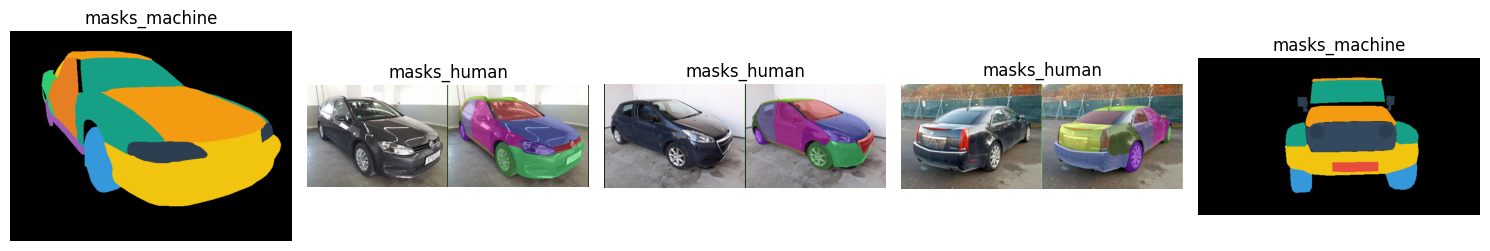


--- Analysis of 'Car parts dataset' ---
Found a total of 2442 images.

No class sub-folders found. The images might be in a single folder without labels.

Visualizing a few random images from the 'Car parts dataset' folder:


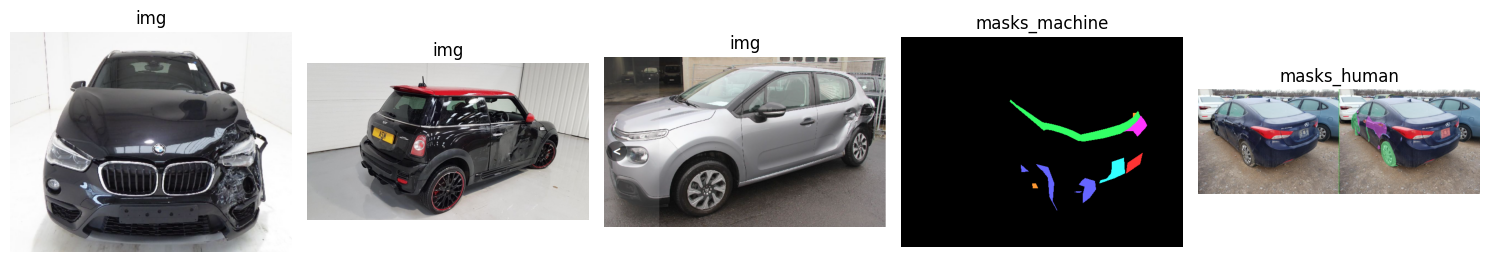

In [2]:
import os
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import random

# Base paths to the two main datasets
damage_dir = '/content/extracted_data/Car damages dataset'
parts_dir = '/content/extracted_data/Car parts dataset'

# Helper function to find all image files with multiple extensions
def find_all_images(base_path, extensions=['.jpg', '.jpeg', '.png']):
    image_paths = []
    for ext in extensions:
        # os.walk is more reliable for nested folders than glob.
        for root, dirs, files in os.walk(base_path):
            for file in files:
                if file.lower().endswith(ext):
                    image_paths.append(os.path.join(root, file))
    return image_paths

# --- Analysis of 'Car damages dataset' ---
print("--- Analysis of 'Car damages dataset' ---")
damage_image_paths = find_all_images(damage_dir)
if damage_image_paths:
    print(f"Found a total of {len(damage_image_paths)} images.")

    # Analyze classes
    damage_class_counts = defaultdict(int)
    for image_path in damage_image_paths:
        parent_folder = os.path.basename(os.path.dirname(image_path))
        # Exclude common folders that aren't classes
        if parent_folder not in ['File1', 'img', 'ann', 'masks_human', 'masks_machine']:
            damage_class_counts[parent_folder] += 1

    if damage_class_counts:
        print("\nIdentified classes and their image counts:")
        for class_name, count in sorted(damage_class_counts.items()):
            print(f"  - {class_name}: {count} images")
    else:
        print("\nNo class sub-folders found. The images might be in a single folder without labels.")

    # Visualize a few images
    print("\nVisualizing a few random images from the 'Car damages dataset' folder:")
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    sample_images = random.sample(damage_image_paths, min(5, len(damage_image_paths)))
    for i, img_path in enumerate(sample_images):
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].set_title(os.path.basename(os.path.dirname(img_path)))
            axes[i].axis('off')
        except Exception as e:
            axes[i].set_title("Error")
            axes[i].axis('off')
            print(f"Error loading image {img_path}: {e}")
    plt.tight_layout()
    plt.show()

# --- Analysis of 'Car parts dataset' ---
print("\n--- Analysis of 'Car parts dataset' ---")
parts_image_paths = find_all_images(parts_dir)
if parts_image_paths:
    print(f"Found a total of {len(parts_image_paths)} images.")

    # Analyze classes
    parts_class_counts = defaultdict(int)
    for image_path in parts_image_paths:
        parent_folder = os.path.basename(os.path.dirname(image_path))
        if parent_folder not in ['File1', 'img', 'ann', 'masks_human', 'masks_machine']:
            parts_class_counts[parent_folder] += 1

    if parts_class_counts:
        print("\nIdentified classes and their image counts:")
        for class_name, count in sorted(parts_class_counts.items()):
            print(f"  - {class_name}: {count} images")
    else:
        print("\nNo class sub-folders found. The images might be in a single folder without labels.")

    # Visualize a few images
    print("\nVisualizing a few random images from the 'Car parts dataset' folder:")
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    sample_images = random.sample(parts_image_paths, min(5, len(parts_image_paths)))
    for i, img_path in enumerate(sample_images):
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].set_title(os.path.basename(os.path.dirname(img_path)))
            axes[i].axis('off')
        except Exception as e:
            axes[i].set_title("Error")
            axes[i].axis('off')
            print(f"Error loading image {img_path}: {e}")
    plt.tight_layout()
    plt.show()

In [3]:
import os
import json

# Root folder where your extracted_data is located
root_dir = "extracted_data"

def count_files(dataset_path):
    counts = {}
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            ann_path = os.path.join(folder_path, "ann")
            img_path = os.path.join(folder_path, "img")

            ann_count = len([f for f in os.listdir(ann_path) if f.endswith(".json")]) if os.path.exists(ann_path) else 0
            img_count = len([f for f in os.listdir(img_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]) if os.path.exists(img_path) else 0

            counts[folder] = {
                "annotations": ann_count,
                "images": img_count
            }
    return counts

results = {}
for dataset in os.listdir(root_dir):
    dataset_path = os.path.join(root_dir, dataset)
    if os.path.isdir(dataset_path):
        results[dataset] = count_files(dataset_path)

# Print results
print(json.dumps(results, indent=4))


{
    "Car damages dataset": {
        "File1": {
            "annotations": 998,
            "images": 998
        }
    },
    "Car parts dataset": {
        "File1": {
            "annotations": 814,
            "images": 814
        }
    }
}


In [4]:
import json, glob, os
root = '/content/extracted_data/Car parts dataset'
for meta in glob.glob(os.path.join(root, '**', 'meta.json'), recursive=True):
    data = json.load(open(meta))
    titles = [c.get('title') for c in data.get('classes', [])]
    print(meta, titles)

/content/extracted_data/Car parts dataset/meta.json ['Missing part', 'Broken part', 'Scratch', 'Cracked', 'Dent', 'Flaking', 'Paint chip', 'Corrosion']


In [5]:
import os
os.environ['DATA_ROOT'] = '/content/extracted_data/Car parts dataset'  # для повреждений
os.environ['ALLOWED_CLASSES'] = 'Crack,Dent,Scratch'                     # временно, как у вас
os.environ['ALLOWED_CASE_INSENSITIVE'] = '1'                             # регистронезависимо
os.environ['EPOCHS'] = '10'

Фильтрация классов включена: ['Broken part', 'Corrosion', 'Cracked', 'Dent', 'Flaking', 'Missing part', 'Paint chip', 'Scratch'] | Регистронезависимо: True
Найдено аннотаций: 814 | Классов: 8 -> ['Broken part', 'Corrosion', 'Cracked', 'Dent', 'Flaking', 'Missing part', 'Paint chip', 'Scratch']
Обучающий набор: 732 изображений
Валидационный набор: 82 изображений
[Epoch 1/10] train_loss: 1.7757 | val_loss: 1.6270
[Epoch 2/10] train_loss: 1.5889 | val_loss: 1.5328
[Epoch 3/10] train_loss: 1.4957 | val_loss: 1.5406
[Epoch 4/10] train_loss: 1.3159 | val_loss: 1.5966
[Epoch 5/10] train_loss: 1.2432 | val_loss: 1.6809
[Epoch 6/10] train_loss: 1.1790 | val_loss: 1.8069
[Epoch 7/10] train_loss: 1.1008 | val_loss: 1.7902
[Epoch 8/10] train_loss: 1.0923 | val_loss: 1.8090
[Epoch 9/10] train_loss: 1.0879 | val_loss: 1.8307
[Epoch 10/10] train_loss: 1.0760 | val_loss: 1.8414
Сохранена финальная модель: checkpoints/maskrcnn_last.pth
Обучение завершено!
Скачиваем архив: checkpoints_export.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

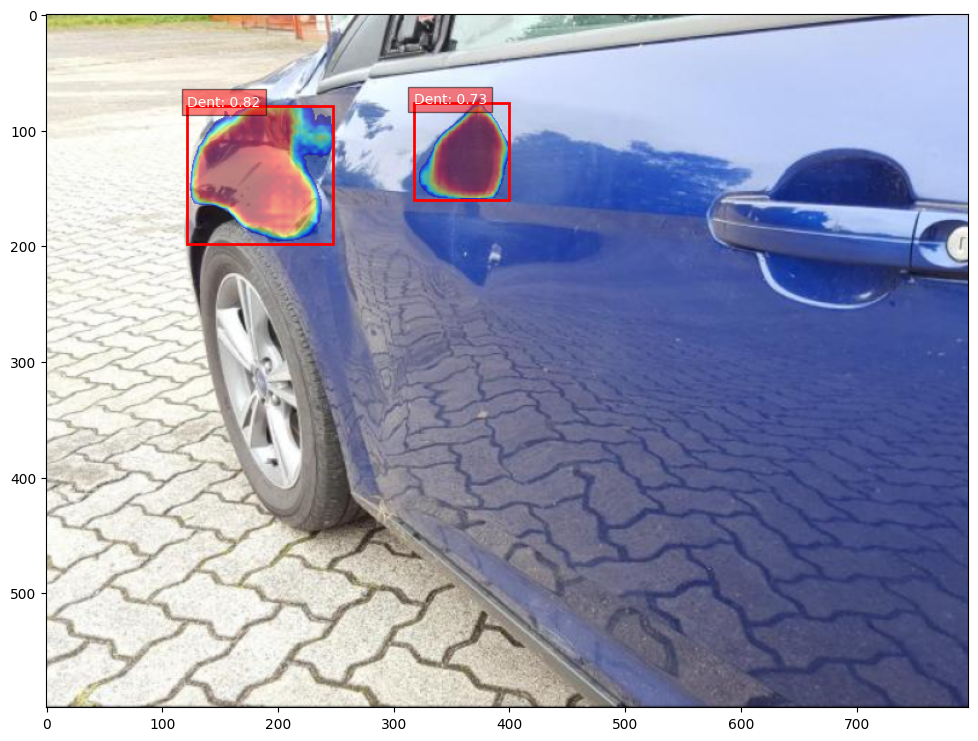

In [7]:
import os
import json
import glob
import random
from typing import Dict, List, Tuple, Optional, Set

import cv2
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image, UnidentifiedImageError
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
import matplotlib.pyplot as plt

# =========================
# Конфигурация (меняйте по необходимости)
# =========================
DATA_ROOT = '/content/extracted_data/Car parts dataset'  # ваш путь к датасету
EPOCHS = 10
BATCH_SIZE = 2
SEED = 42

# Классы повреждений из вашего meta.json:
ALLOWED_CLASSES = [
    'Missing part', 'Broken part', 'Scratch', 'Cracked', 'Dent',
    'Flaking', 'Paint chip', 'Corrosion'
]
# Сравнивать названия без учета регистра:
ALLOWED_CASE_INSENSITIVE = True

# =========================
# Воспроизводимость
# =========================
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# =========================
# Датасет
# =========================
class CarDamageDataset(Dataset):
    """
    Dataset для Supervisely-подобной структуры:
    - Аннотации: .../ann/*.json (по файлу на картинку)
    - Изображения: .../img/<same_basename>.<ext>
    - Meta: meta.json где-то в поддереве (опционально)
    Поддерживает:
    - objects[].classTitle или annotations[].label/...
    - points.exterior (полигон) и 2-точечные прямоугольники
    """

    def __init__(
        self,
        root_dir: str,
        transform=None,
        allowed_classes: Optional[Set[str]] = None,
        allowed_case_insensitive: bool = False
    ):
        self.root_dir = root_dir
        self.transform = transform
        self.allowed_classes: Optional[Set[str]] = set(allowed_classes) if allowed_classes else None
        self.allowed_case_insensitive: bool = allowed_case_insensitive

        def is_allowed(title: Optional[str]) -> bool:
            if not title or self.allowed_classes is None:
                return self.allowed_classes is None
            if self.allowed_case_insensitive:
                return title.lower() in {c.lower() for c in self.allowed_classes}
            return title in self.allowed_classes
        self._is_allowed = is_allowed

        # Собираем все json аннотаций (кроме meta.json)
        all_jsons = glob.glob(os.path.join(self.root_dir, '**', '*.json'), recursive=True)
        self.annotation_paths = [p for p in all_jsons if os.sep + 'ann' + os.sep in p and os.path.basename(p) != 'meta.json']
        if len(self.annotation_paths) == 0:
            # fallback, если структура иная
            self.annotation_paths = [p for p in all_jsons if os.path.basename(p) != 'meta.json']

        # Загружаем аннотации
        self.annotations: Dict[str, dict] = self.load_all_annotations()

        # Базовые имена без .json
        raw_names: List[str] = [os.path.splitext(os.path.basename(ann_path))[0] for ann_path in self.annotation_paths]

        # Разрешенные расширения
        self.img_exts = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp'}

        def find_image_path(base: str) -> Optional[str]:
            base_root, base_ext = os.path.splitext(base)
            candidates: List[str] = []
            if base_ext.lower() in self.img_exts:
                patterns = [
                    os.path.join(self.root_dir, '**', 'img', base),
                    os.path.join(self.root_dir, '**', base),
                ]
                for pat in patterns:
                    candidates += glob.glob(pat, recursive=True)
            else:
                patterns = [os.path.join(self.root_dir, '**', 'img', base + ext) for ext in self.img_exts] + \
                           [os.path.join(self.root_dir, '**', base + ext) for ext in self.img_exts]
                for pat in patterns:
                    candidates += glob.glob(pat, recursive=True)
            candidates = [p for p in candidates if os.path.splitext(p)[1].lower() in self.img_exts]
            return candidates[0] if candidates else None

        # Инициализация списка изображений и индекс путей
        self.image_paths: Dict[str, str] = {}
        self.images: List[str] = []
        for nm in raw_names:
            img_path = find_image_path(nm)
            if img_path is None and '.' in nm:
                nm_root, _ = os.path.splitext(nm)
                img_path = find_image_path(nm_root)
            if img_path:
                self.image_paths[nm] = img_path
                self.images.append(nm)
            else:
                print(f"[WARN] Не найдено изображение для '{nm}', пример аннотации будет пропущен.")

        # Классы из meta.json (если нет — соберем из аннотаций)
        self.class_mapping: Dict[str, int] = self.load_class_mapping()
        if not self.class_mapping:
            labels = set()
            for ann in self.annotations.values():
                objects = ann.get('objects', ann.get('annotations', [])) or []
                for obj in objects:
                    title = obj.get('classTitle') or obj.get('label') or obj.get('class') or obj.get('name')
                    if title and self._is_allowed(title):
                        labels.add(title)
            self.class_mapping = {title: i for i, title in enumerate(sorted(labels), 1)}
        self.classes: List[str] = list(self.class_mapping.keys())

    def get_all_labels(self) -> List[str]:
        labels = set()
        for ann in self.annotations.values():
            objects = ann.get('objects', ann.get('annotations', [])) or []
            for obj in objects:
                title = obj.get('classTitle') or obj.get('label') or obj.get('class') or obj.get('name')
                if title:
                    labels.add(title)
        return sorted(labels)

    def load_all_annotations(self) -> Dict[str, dict]:
        annotations_dict: Dict[str, dict] = {}
        for ann_path in self.annotation_paths:
            img_name = os.path.splitext(os.path.basename(ann_path))[0]
            try:
                with open(ann_path, 'r') as f:
                    annotations_dict[img_name] = json.load(f)
            except Exception as e:
                print(f"[WARN] Не удалось прочитать аннотацию {ann_path}: {e}")
        return annotations_dict

    def load_class_mapping(self) -> Dict[str, int]:
        # Ищем meta.json
        candidates = []
        direct = os.path.join(self.root_dir, 'meta.json')
        if os.path.exists(direct):
            candidates.append(direct)
        else:
            candidates = glob.glob(os.path.join(self.root_dir, '**', 'meta.json'), recursive=True)

        for meta_path in candidates:
            try:
                with open(meta_path, 'r') as f:
                    meta = json.load(f)
                classes = meta.get('classes', [])
                if isinstance(classes, list) and classes:
                    titles = [c.get('title', f'class_{i+1}') for i, c in enumerate(classes)]
                    if self.allowed_classes is not None:
                        if self.allowed_case_insensitive:
                            allow_l = {c.lower() for c in self.allowed_classes}
                            titles = [t for t in titles if t.lower() in allow_l]
                        else:
                            titles = [t for t in titles if t in self.allowed_classes]
                    if titles:
                        return {t: i + 1 for i, t in enumerate(titles)}
            except Exception as e:
                print(f"[WARN] Не удалось прочитать meta.json {meta_path}: {e}")
        return {}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, Dict[str, torch.Tensor]]:
        img_key = self.images[idx]
        img_path = self.image_paths.get(img_key)
        if not img_path or not os.path.exists(img_path):
            raise FileNotFoundError(f"Изображение для {img_key} не найдено.")
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            raise UnidentifiedImageError(f"Не удалось открыть изображение '{img_path}': {e}")
        w, h = image.size

        ann = self.annotations.get(img_key, {})
        boxes: List[List[float]] = []
        labels: List[int] = []
        masks: List[np.ndarray] = []

        objects = ann.get("objects", ann.get("annotations", [])) or []
        for obj in objects:
            class_title = obj.get('classTitle') or obj.get('label') or obj.get('class') or obj.get('name')
            if not class_title:
                continue
            # фильтр классов
            if self.allowed_classes is not None:
                if self.allowed_case_insensitive:
                    if class_title.lower() not in {c.lower() for c in self.allowed_classes}:
                        continue
                else:
                    if class_title not in self.allowed_classes:
                        continue
            if class_title not in self.class_mapping:
                continue

            pts = None
            if 'points' in obj and isinstance(obj['points'], dict):
                pts = obj['points'].get('exterior') or obj['points'].get('polygon') or obj['points'].get('points')
            if not pts or len(pts) < 2:
                continue

            if len(pts) == 2:
                # прямоугольник
                (x1, y1), (x2, y2) = pts
                xmin = max(0.0, min(float(x1), float(x2)))
                ymin = max(0.0, min(float(y1), float(y2)))
                xmax = min(float(w - 1), max(float(x1), float(x2)))
                ymax = min(float(h - 1), max(float(y1), float(y2)))
                if xmax <= xmin or ymax <= ymin:
                    continue
                mask = np.zeros((h, w), dtype=np.uint8)
                cv2.rectangle(mask, (int(round(xmin)), int(round(ymin))),
                              (int(round(xmax)), int(round(ymax))), color=1, thickness=-1)
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(self.class_mapping[class_title])
                masks.append(mask)
            else:
                # полигон
                x_coords = [float(p[0]) for p in pts]
                y_coords = [float(p[1]) for p in pts]
                xmin = max(0.0, min(x_coords))
                ymin = max(0.0, min(y_coords))
                xmax = min(float(w - 1), max(x_coords))
                ymax = min(float(h - 1), max(y_coords))
                if xmax <= xmin or ymax <= ymin:
                    continue
                mask = np.zeros((h, w), dtype=np.uint8)
                poly = np.array([[int(round(x)), int(round(y))] for x, y in zip(x_coords, y_coords)], dtype=np.int32)
                cv2.fillPoly(mask, [poly], 1)
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(self.class_mapping[class_title])
                masks.append(mask)

        if len(boxes) == 0:
            boxes_t = torch.zeros((0, 4), dtype=torch.float32)
            labels_t = torch.zeros((0,), dtype=torch.int64)
            masks_t = torch.zeros((0, h, w), dtype=torch.uint8)
            area_t = torch.zeros((0,), dtype=torch.float32)
            iscrowd_t = torch.zeros((0,), dtype=torch.int64)
        else:
            boxes_t = torch.as_tensor(boxes, dtype=torch.float32)
            labels_t = torch.as_tensor(labels, dtype=torch.int64)
            masks_t = torch.as_tensor(np.stack(masks, axis=0), dtype=torch.uint8)
            area_t = (boxes_t[:, 3] - boxes_t[:, 1]) * (boxes_t[:, 2] - boxes_t[:, 0])
            iscrowd_t = torch.zeros((boxes_t.shape[0],), dtype=torch.int64)

        target: Dict[str, torch.Tensor] = {
            "boxes": boxes_t,
            "labels": labels_t,
            "masks": masks_t,
            "image_id": torch.tensor([idx], dtype=torch.int64),
            "area": area_t,
            "iscrowd": iscrowd_t,
        }

        if self.transform:
            image = self.transform(image)

        return image, target

# =========================
# Трансформации, датасет и лоадеры
# =========================
transform = T.Compose([T.ToTensor()])

dataset = CarDamageDataset(
    root_dir=DATA_ROOT,
    transform=transform,
    allowed_classes=set(ALLOWED_CLASSES),
    allowed_case_insensitive=ALLOWED_CASE_INSENSITIVE
)

if ALLOWED_CLASSES:
    print(f"Фильтрация классов включена: {sorted(ALLOWED_CLASSES)} | Регистронезависимо: {ALLOWED_CASE_INSENSITIVE}")
print(f"Найдено аннотаций: {len(dataset)} | Классов: {len(dataset.class_mapping)} -> {sorted(dataset.class_mapping.keys())}")

if len(dataset.class_mapping) == 0:
    all_labels = dataset.get_all_labels()
    print("[ERROR] Ни один класс не совпал с ALLOWED_CLASSES.")
    print(f"Доступные классы в аннотациях ({len(all_labels)}): {all_labels[:50]}{' ...' if len(all_labels) > 50 else ''}")
    raise ValueError("Нет подходящих классов для обучения. Проверьте имена в ALLOWED_CLASSES.")

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

def collate_fn(batch):
    return tuple(zip(*batch))

use_cuda = torch.cuda.is_available()
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    collate_fn=collate_fn, num_workers=2, pin_memory=use_cuda
)
val_loader = DataLoader(
    val_dataset, batch_size=BATCH_SIZE, shuffle=False,
    collate_fn=collate_fn, num_workers=2, pin_memory=use_cuda
)

print(f"Обучающий набор: {len(train_dataset)} изображений")
print(f"Валидационный набор: {len(val_dataset)} изображений")

# =========================
# Модель
# =========================
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT)

num_classes = len(dataset.class_mapping) + 1  # +1 фоновый класс
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, 256, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    torch.backends.cudnn.benchmark = True
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-4)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

scaler = torch.amp.GradScaler('cuda' if device.type == 'cuda' else 'cpu')

# =========================
# Обучение
# =========================
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0.0
    for images, targets in train_loader:
        images = [image.to(device, non_blocking=True) for image in images]
        targets = [{k: v.to(device, non_blocking=True) for k, v in t.items()} for t in targets]

        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast(device_type='cuda', enabled=(device.type == 'cuda')):
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())

        scaler.scale(losses).backward()
        scaler.step(optimizer)
        scaler.update()
        total_loss += losses.item()

    avg_loss = total_loss / max(1, len(train_loader))

    # Валидационный лосс (torchvision возвращает лоссы только в режиме train())
    # Считаем лосс в train() под torch.no_grad(), затем вернем eval() если нужно.
    prev_training = model.training
    model.train()
    val_total = 0.0
    with torch.no_grad():
        for images, targets in val_loader:
            images = [image.to(device, non_blocking=True) for image in images]
            targets = [{k: v.to(device, non_blocking=True) for k, v in t.items()} for t in targets]
            with torch.amp.autocast(device_type='cuda', enabled=(device.type == 'cuda')):
                val_out = model(images, targets)
                if isinstance(val_out, dict):
                    val_losses = sum(loss for loss in val_out.values())
                    val_total += float(val_losses.item())
                else:
                    # На случай неожиданных версий torchvision — пропустим батч
                    continue
    val_avg = val_total / max(1, len(val_loader)) if len(val_dataset) > 0 else float('nan')
    if not prev_training:
        model.eval()

    lr_scheduler.step()
    print(f"[Epoch {epoch+1}/{EPOCHS}] train_loss: {avg_loss:.4f} | val_loss: {val_avg:.4f}")

    # чекпоинт: сохраняем ТОЛЬКО на последней эпохе
    if (epoch + 1) == EPOCHS:
        os.makedirs('checkpoints', exist_ok=True)
        ckpt_path = os.path.join('checkpoints', 'maskrcnn_last.pth')
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'class_mapping': dataset.class_mapping,
            'seed': SEED,
        }, ckpt_path)
        with open(os.path.join('checkpoints', 'classes.json'), 'w') as f:
            json.dump(dataset.class_mapping, f, ensure_ascii=False, indent=2)
        print(f"Сохранена финальная модель: {ckpt_path}")

print("Обучение завершено!")

import shutil, os
from google.colab import files

archive_path = 'checkpoints_export.zip'
if os.path.exists(archive_path):
    os.remove(archive_path)

shutil.make_archive('checkpoints_export', 'zip', 'checkpoints')
print(f"Скачиваем архив: {archive_path}")
files.download(archive_path)

# =========================
# Визуализация одного примера
# =========================
def visualize_prediction(image, prediction, score_threshold=0.7):
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)

    boxes = prediction['boxes']
    labels = prediction['labels']
    scores = prediction['scores']
    masks = prediction['masks']

    for i in range(len(boxes)):
        score = scores[i].item()
        if score > score_threshold:
            mask = masks[i].squeeze().detach().cpu().numpy()
            ax.imshow(np.ma.masked_where(mask < 0.5, mask), cmap='jet', alpha=0.5)

            box = boxes[i].detach().cpu().numpy()
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

            label_index = labels[i].item()
            label = list(dataset.class_mapping.keys())[list(dataset.class_mapping.values()).index(label_index)]
            ax.text(xmin, ymin, f"{label}: {score:.2f}",
                    bbox=dict(facecolor='red', alpha=0.5),
                    fontsize=10, color='white')

    plt.show()

if len(val_dataset) > 0:
    model.eval()
    image_val, target_val = val_dataset[0]
    with torch.no_grad():
        prediction = model([image_val.to(device)])
    image_np = image_val.permute(1, 2, 0).cpu().numpy()
    visualize_prediction(image_np, prediction[0])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_prediction(image, prediction, score_threshold=0.5, mask_threshold=0.5, alpha=0.6):
    # image: PIL.Image
    img_np = np.array(image).copy()  # uint8 RGB
    H, W = img_np.shape[:2]

    boxes = prediction.get('boxes', None)
    labels = prediction.get('labels', None)
    scores = prediction.get('scores', None)
    masks  = prediction.get('masks', None)

    if boxes is None or labels is None or scores is None:
        raise ValueError("prediction должен содержать ключи: 'boxes', 'labels', 'scores' (и опционально 'masks').")

    # Фильтруем по порогу уверенности
    keep = scores >= score_threshold
    boxes  = boxes[keep].cpu()
    labels = labels[keep].cpu()
    scores = scores[keep].cpu()
    masks  = masks[keep].cpu() if masks is not None else None

    # Подготовим полотно для рисования (чтобы маски были явно заметны)
    canvas = img_np.copy()

    # Стабильные цвета по классам
    rng = np.random.RandomState(0)
    cls_ids = set(labels.numpy().tolist())
    class_colors = {int(cid): tuple(rng.randint(0, 255, size=3).tolist()) for cid in cls_ids}

    # Закрашиваем маски (если есть)
    if masks is not None and len(masks) > 0:
        for i in range(len(masks)):
            # masks[i] может быть (1,H,W) или (H,W)
            m = masks[i].squeeze().numpy()
            # нормируем в [0,1] на всякий случай
            if m.max() > 1.0:
                m = m / 255.0
            mask_bin = m >= mask_threshold  # где True — область объекта
            if mask_bin.any():
                cid = int(labels[i].item())
                color = np.array(class_colors.get(cid, (255, 0, 0)), dtype=np.float32)
                # alpha-композитинг прямо в canvas
                canvas[mask_bin] = (1 - alpha) * canvas[mask_bin] + alpha * color

    # Рисуем рамки и подписи
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(canvas.astype(np.uint8))

    for i in range(len(boxes)):
        xmin, ymin, xmax, ymax = boxes[i].numpy()
        cid   = int(labels[i].item())
        score = float(scores[i].item())
        color = np.array(class_colors.get(cid, (255,0,0))) / 255.0

        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)

        # Имя класса: если есть id_to_name, используем его; иначе просто id
        try:
            name = id_to_name.get(cid, f'class_{cid}')
        except NameError:
            name = f'class_{cid}'

        ax.text(xmin, ymin, f"{name}: {score:.2f}",
                bbox=dict(facecolor='black', alpha=0.5),
                fontsize=10, color='white')

    ax.axis('off')
    plt.tight_layout()
    plt.show()

In [17]:
import os, json, io
import numpy as np
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CKPT_PATH = '/content/checkpoints/maskrcnn_last.pth'   # переименуйте, если у вас другое имя
CLASSES_JSON = '/content/classes.json'       # опционально

# 1) Загрузим class_mapping
def load_class_mapping(ckpt_path: str, classes_json_path: str = None):
    if classes_json_path and os.path.exists(classes_json_path):
        with open(classes_json_path, 'r') as f:
            mapping = json.load(f)
        # mapping: {"Dent": 1, "Scratch": 2, ...}
        return mapping
    # иначе пробуем из самого чекпоинта
    ckpt = torch.load(ckpt_path, map_location='cpu')
    mapping = ckpt.get('class_mapping')
    if not mapping:
        raise RuntimeError("Не удалось найти class_mapping ни в classes.json, ни в чекпоинте.")
    return mapping

class_mapping = load_class_mapping(CKPT_PATH, CLASSES_JSON)
# Словарь id->name, id начинаются с 1
id_to_name = {v: k for k, v in class_mapping.items()}
num_classes = len(class_mapping) + 1  # +1 фоновый класс

# 2) Собираем модель и грузим веса
def build_model(num_classes: int):
    # Без предобученных весов, чтобы не скачивать COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=None, weights_backbone=None)
    # Заменим головы под наше число классов
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, 256, num_classes)
    return model

model = build_model(num_classes)
ckpt = torch.load(CKPT_PATH, map_location='cpu')
state = ckpt.get('model_state_dict', ckpt)  # на случай, если сохранено напрямую
missing, unexpected = model.load_state_dict(state, strict=False)
if missing or unexpected:
    print("[WARN] Несовпадение ключей при загрузке state_dict")
    if missing: print("  Missing keys:", missing)
    if unexpected: print("  Unexpected keys:", unexpected)

model.to(device)
model.eval()
print("Модель загружена. Классы:", sorted(class_mapping.keys()))

# 3) Трансформа и инференс
to_tensor = T.ToTensor()

@torch.no_grad()
def predict_image(img_pil, score_thr=0.5):
    img = to_tensor(img_pil).to(device)
    outputs = model([img])[0]
    # Фильтруем по порогу
    keep = outputs['scores'] >= score_thr
    pred = {
        'boxes': outputs['boxes'][keep].detach().cpu(),
        'labels': outputs['labels'][keep].detach().cpu(),
        'scores': outputs['scores'][keep].detach().cpu(),
        'masks': outputs['masks'][keep].detach().cpu() if 'masks' in outputs else None
    }
    return pred

def visualize_prediction(img_pil, prediction, alpha=0.5):
    img_np = np.array(img_pil)
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img_np)

    boxes = prediction['boxes']
    labels = prediction['labels']
    scores = prediction['scores']
    masks = prediction['masks']

    # Цвета по классам (стабильные)
    rng = np.random.RandomState(0)
    class_colors = {}
    for cid in set(labels.numpy().tolist()):
        class_colors[int(cid)] = tuple(rng.randint(0, 255, size=3).tolist())

    for i in range(len(boxes)):
        score = float(scores[i].item())
        cid = int(labels[i].item())
        name = id_to_name.get(cid, f'class_{cid}')
        color = class_colors.get(cid, (255, 0, 0))

        # Маска
        if masks is not None and len(masks) > i:
            mask = masks[i].squeeze().numpy()  # HxW, значения [0..1]
            m = mask >= 0.5
            overlay = img_np.copy()
            overlay[m] = (0.5 * overlay[m] + 0.5 * np.array(color)).astype(np.uint8)
            ax.imshow(overlay, alpha=alpha)

        # Рамка
        xmin, ymin, xmax, ymax = boxes[i].numpy()
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, edgecolor=np.array(color)/255.0, linewidth=2)
        ax.add_patch(rect)

        # Подпись
        ax.text(xmin, ymin, f"{name}: {score:.2f}",
                bbox=dict(facecolor='black', alpha=0.5),
                fontsize=10, color='white')

    ax.axis('off')
    plt.show()

print("Готово к инференсу. Используйте следующий блок для загрузки изображений.")

Модель загружена. Классы: ['Broken part', 'Corrosion', 'Cracked', 'Dent', 'Flaking', 'Missing part', 'Paint chip', 'Scratch']
Готово к инференсу. Используйте следующий блок для загрузки изображений.


In [19]:
# ===== ВИЗУАЛИЗАЦИЯ НА ВАЛ-СЕТЕ С МАСКАМИ =====
import os, numpy as np, matplotlib.pyplot as plt
from PIL import Image
import torch

# Параметры
SCORE_THR = 0.5      # порог уверенности детекции
MASK_THR  = 0.5      # порог бинаризации маски
ALPHA     = 0.70      # непрозрачность заливки маски (0..1)
MAX_SAMPLES = 12      # сколько вал-изображений показать/сохранить
SAVE_DIR = '/content/val_vis'

os.makedirs(SAVE_DIR, exist_ok=True)

# На всякий случай
model.eval()
if hasattr(model, 'roi_heads') and hasattr(model.roi_heads, 'score_thresh'):
    # Можно задать порог прямо в модели (необязательно)
    model.roi_heads.score_thresh = SCORE_THR

def to_pil_from_tensor(img_t):
    # img_t: torch.Tensor CxHxW (обычно из ToTensor(), диапазон [0,1])
    arr = img_t.permute(1, 2, 0).detach().cpu().numpy()
    if arr.max() <= 1.0:
        arr = (arr * 255).astype('uint8')
    else:
        arr = arr.astype('uint8')
    return Image.fromarray(arr)

def get_label_name(cid: int):
    # Пытаемся вернуть имя класса:
    # - если есть dataset.classes (как в train.py) → используем его
    # - если в среде есть id_to_name (как в test.py) → используем его
    # - иначе просто 'class_<id>'
    try:
        if 'dataset' in globals() and hasattr(dataset, 'classes') and len(dataset.classes) >= cid:
            return dataset.classes[cid - 1]
    except Exception:
        pass
    try:
        if 'id_to_name' in globals():
            return id_to_name.get(cid, f'class_{cid}')
    except Exception:
        pass
    return f'class_{cid}'

def visualize_prediction(image_pil, prediction, score_threshold=0.5, mask_threshold=0.5, alpha=0.6, save_path=None):
    import numpy as np
    import matplotlib.pyplot as plt

    img_np = np.array(image_pil).copy()  # HxWx3, uint8
    boxes  = prediction.get('boxes', None)
    labels = prediction.get('labels', None)
    scores = prediction.get('scores', None)
    masks  = prediction.get('masks', None)

    if boxes is None or labels is None or scores is None:
        raise ValueError("prediction должен содержать 'boxes', 'labels', 'scores' (и опционально 'masks').")

    # Фильтрация по порогу уверенности
    keep = scores >= score_threshold
    boxes  = boxes[keep].cpu()
    labels = labels[keep].cpu()
    scores = scores[keep].cpu()
    masks  = masks[keep].cpu() if masks is not None else None

    # Стабильные цвета на класс
    rng = np.random.RandomState(0)
    cls_ids = set(labels.numpy().tolist())
    class_colors = {int(cid): tuple(rng.randint(0, 255, size=3).tolist()) for cid in cls_ids}

    # Готовим канвас для оверлея
    canvas = img_np.copy()
    if masks is not None and len(masks) > 0:
        for i in range(len(masks)):
            m = masks[i].squeeze().numpy()  # HxW, [0..1]
            if m.max() > 1.0:
                m = m / 255.0
            mask_bin = m >= mask_threshold
            if mask_bin.any():
                cid = int(labels[i].item())
                color = np.array(class_colors.get(cid, (255, 0, 0)), dtype=np.float32)
                canvas[mask_bin] = (1 - alpha) * canvas[mask_bin] + alpha * color

    # Фигура: слева оригинал, справа — оверлей
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 9))
    ax0.imshow(img_np)
    ax0.set_title('Original')
    ax0.axis('off')

    ax1.imshow(canvas.astype(np.uint8))
    ax1.set_title('Overlay (masks + boxes)')
    ax1.axis('off')

    # Рисуем рамки/подписи на правом subplot
    for i in range(len(boxes)):
        xmin, ymin, xmax, ymax = boxes[i].numpy()
        cid   = int(labels[i].item())
        score = float(scores[i].item())
        color = np.array(class_colors.get(cid, (255, 0, 0))) / 255.0

        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, edgecolor=color, linewidth=2)
        ax1.add_patch(rect)

        # Имя класса (используем вашу get_label_name, если есть)
        try:
            name = get_label_name(cid)
        except NameError:
            name = f'class_{cid}'

        ax1.text(xmin, ymin, f"{name}: {score:.2f}",
                 bbox=dict(facecolor='black', alpha=0.5),
                 fontsize=10, color='white')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=120)
        plt.close(fig)
    else:
        plt.show()

# Прогон по вал-изображениям
n = min(MAX_SAMPLES, len(val_dataset))
print(f"Визуализируем {n} примеров из вал-сета → {SAVE_DIR}")
for i in range(n):
    img_t, _ = val_dataset[i]           # CxHxW тензор
    img_pil  = to_pil_from_tensor(img_t)

    with torch.no_grad():
        out = model([img_t.to(device)])[0]

    # Готовим словарь, совместимый с visualize_prediction
    keep = out['scores'] >= SCORE_THR
    pred = {
        'boxes':  out['boxes'][keep].detach().cpu(),
        'labels': out['labels'][keep].detach().cpu(),
        'scores': out['scores'][keep].detach().cpu(),
        'masks':  out['masks'][keep].detach().cpu() if 'masks' in out else None,
    }

    out_path = os.path.join(SAVE_DIR, f'val_{i:02d}_vis.jpg')
    visualize_prediction(img_pil, pred,
                         score_threshold=SCORE_THR,
                         mask_threshold=MASK_THR,
                         alpha=ALPHA,
                         save_path=out_path)
    print(f"Saved: {out_path}")

Визуализируем 12 примеров из вал-сета → /content/val_vis
Saved: /content/val_vis/val_00_vis.jpg
Saved: /content/val_vis/val_01_vis.jpg
Saved: /content/val_vis/val_02_vis.jpg
Saved: /content/val_vis/val_03_vis.jpg
Saved: /content/val_vis/val_04_vis.jpg
Saved: /content/val_vis/val_05_vis.jpg
Saved: /content/val_vis/val_06_vis.jpg
Saved: /content/val_vis/val_07_vis.jpg
Saved: /content/val_vis/val_08_vis.jpg
Saved: /content/val_vis/val_09_vis.jpg
Saved: /content/val_vis/val_10_vis.jpg
Saved: /content/val_vis/val_11_vis.jpg


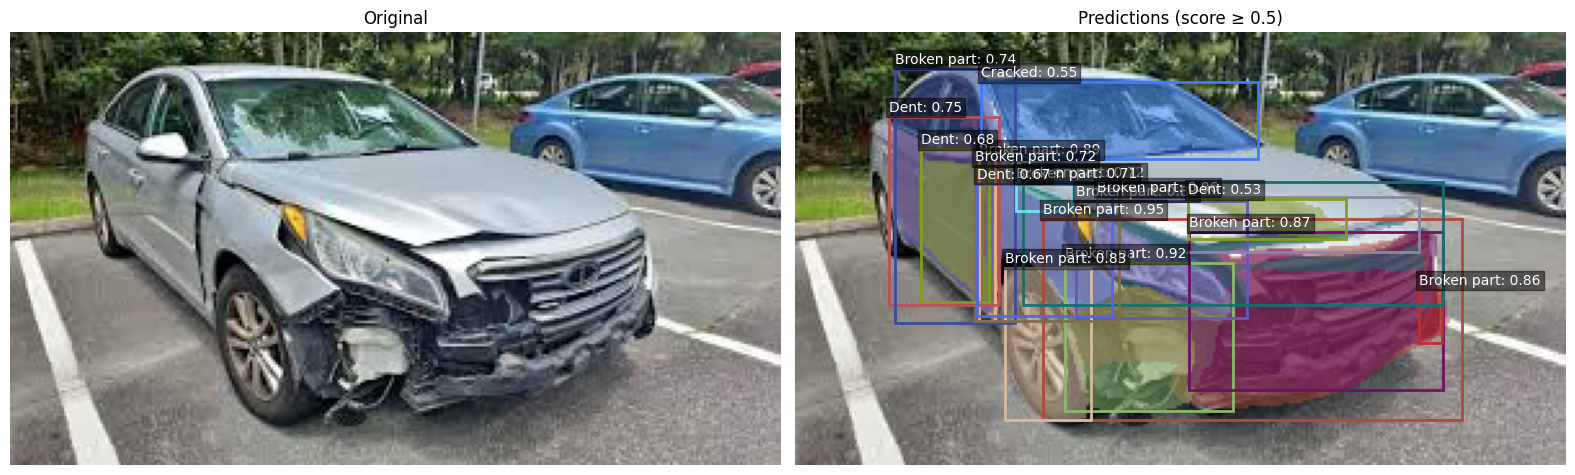

In [21]:
# Colab inference: show original (left) and predictions (right)

import os
import json
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# --- Paths ---
CKPT_PATH = '/content/checkpoints/maskrcnn_last.pth'
CLASSES_PATH = '/content/checkpoints/classes.json'   # optional; fallback to checkpoint content
IMAGE_PATH = '/content/broken.jpeg'

# --- Thresholds & visualization ---
SCORE_THRESHOLD = 0.5
MASK_THRESHOLD = 0.5
ALPHA = 0.5  # mask blend strength (0..1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_class_mapping():
    if os.path.exists(CLASSES_PATH):
        with open(CLASSES_PATH, 'r') as f:
            class_mapping = json.load(f)
        return {k: int(v) for k, v in class_mapping.items()}
    ckpt = torch.load(CKPT_PATH, map_location='cpu')
    if 'class_mapping' in ckpt:
        return {k: int(v) for k, v in ckpt['class_mapping'].items()}
    raise ValueError("Class mapping not found. Provide classes.json or include 'class_mapping' in checkpoint.")

def build_model(num_classes: int):
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=None)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, 256, num_classes)
    return model

def load_model_and_classes():
    class_mapping = load_class_mapping()
    num_classes = len(class_mapping) + 1  # + background
    model = build_model(num_classes)
    ckpt = torch.load(CKPT_PATH, map_location='cpu')
    model.load_state_dict(ckpt['model_state_dict'], strict=True)
    model.to(device).eval()

    id_to_name = {0: 'background'}
    for name, cid in class_mapping.items():
        id_to_name[int(cid)] = name
    return model, id_to_name

def predict_image(model, image_path: str):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")
    image = Image.open(image_path).convert('RGB')
    tensor = T.ToTensor()(image).to(device)
    with torch.no_grad():
        output = model([tensor])[0]
    return image, output

def visualize_side_by_side(image_pil, prediction, id_to_name, score_thr=0.5, mask_thr=0.5, alpha=0.5):
    image = np.array(image_pil)  # HxWx3, uint8
    H, W = image.shape[:2]

    boxes = prediction.get('boxes', torch.empty(0, 4)).detach().cpu().numpy()
    labels = prediction.get('labels', torch.empty(0,)).detach().cpu().numpy().astype(int)
    scores = prediction.get('scores', torch.empty(0,)).detach().cpu().numpy()
    masks = prediction.get('masks', None)
    if masks is not None:
        masks = masks.detach().cpu().numpy()[:, 0, :, :]  # (N, H, W)

    keep = scores >= score_thr
    boxes = boxes[keep]
    labels = labels[keep]
    scores = scores[keep]
    if masks is not None:
        masks = masks[keep]

    # Prepare overlay image by blending mask colors
    overlay = image.astype(np.float32).copy()

    # Deterministic colors
    rng = np.random.RandomState(123)
    colors = (rng.rand(len(boxes), 3) * 255).astype(np.float32)

    if masks is not None and len(masks) > 0:
        for i in range(len(boxes)):
            m = masks[i] >= mask_thr
            if m.any():
                # Blend color into overlay where mask is True
                overlay[m] = (1.0 - alpha) * overlay[m] + alpha * colors[i]

    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    # Plot side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    ax[0].imshow(image)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].imshow(overlay)
    # Draw bboxes and labels on the overlay view
    for i in range(len(boxes)):
        xmin, ymin, xmax, ymax = boxes[i]
        color = colors[i] / 255.0
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, edgecolor=color, linewidth=2)
        ax[1].add_patch(rect)
        cls_id = int(labels[i])
        cls_name = id_to_name.get(cls_id, f"id_{cls_id}")
        ax[1].text(xmin, max(0, ymin - 2), f"{cls_name}: {scores[i]:.2f}",
                   color='white', fontsize=10,
                   bbox=dict(facecolor='black', alpha=0.5, pad=2))
    ax[1].set_title(f'Predictions (score ≥ {score_thr})')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

# ---- Run ----
model, id_to_name = load_model_and_classes()
img_pil, pred = predict_image(model, IMAGE_PATH)
visualize_side_by_side(img_pil, pred, id_to_name, score_thr=SCORE_THRESHOLD, mask_thr=MASK_THRESHOLD, alpha=ALPHA)